In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
bank_notes = pd.read_csv("Banknote-authentication-dataset-.csv")

In [3]:
bank_notes.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [10]:
#Normalization of variables
v1_min = bank_notes["V1"].min()
v1_max = bank_notes["V1"].max()
v2_min = bank_notes["V2"].min()
v2_max = bank_notes["V2"].max()

print(v1_min, v1_max)
print(v2_min, v2_max)

-7.0421 6.8248
-13.7731 12.9516


In [13]:
normed_v1 = (bank_notes["V1"]- v1_min)/(v1_max - v1_min)
normed_v2 = (bank_notes["V2"]- v2_min)/(v2_max - v2_min)

In [20]:
v_min = bank_notes.min()
v_max = bank_notes.max()

print(v_min)
print(" ")
print(v_max)

V1    -7.0421
V2   -13.7731
dtype: float64
 
V1     6.8248
V2    12.9516
dtype: float64


In [21]:
normed_V = (bank_notes - v_min)/(v_max - v_min)

In [22]:
normed_V

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662
...,...,...
1367,0.537124,0.565855
1368,0.407690,0.332868
1369,0.237385,0.011768
1370,0.250842,0.201701


In [23]:
from sklearn.cluster import KMeans

In [65]:
banknote_stacked = np.column_stack((bank_notes["V1"], bank_notes["V2"]))

In [66]:
km_result = KMeans(n_clusters=2).fit(banknote_stacked)

In [67]:
clust = km_result.cluster_centers_

In [68]:
clust

array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591265]])

Text(0, 0.5, 'V2 - axis')

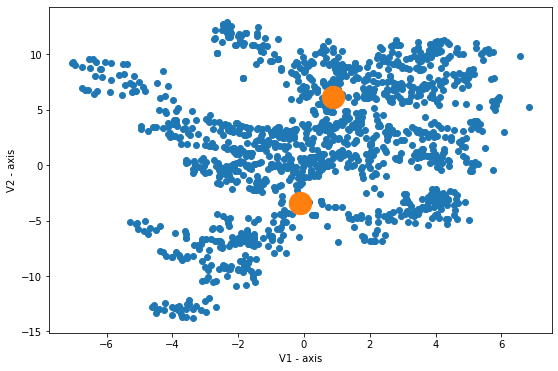

In [72]:
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(bank_notes["V1"],bank_notes["V2"])
ax.scatter(clust[:,0], clust[0:,1], s= 500)
plt.xlabel("V1 - axis")
plt.ylabel("V2 - axis")

In [54]:
V1 = bank_notes["V1"]
V2 = bank_notes["V2"]

In [63]:
xval_0=[]
yval_0=[]
xval_1=[]
yval_1=[]
for i in range(0,len(V1)):
    if(km_result.labels_[i] == 0):
        xval_0.append(V1[i])
        yval_0.append(V2[i])
    else:
        xval_1.append(V1[i])
        yval_1.append(V2[i])

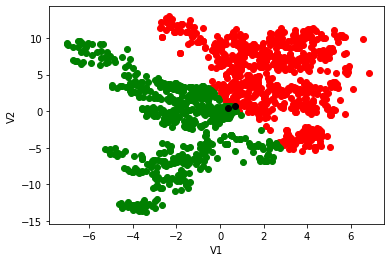

In [64]:
plt.scatter(xval_0,yval_0,c="red")
plt.scatter(xval_1,yval_1,c="green")
plt.scatter(km_result.cluster_centers_[:,0],km_result.cluster_centers_[:,1],c="black")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [74]:
bank_notes.head(20)

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552
5,4.36840,9.6718
6,3.59120,3.0129
7,2.09220,-6.8100
8,3.20320,5.7588
9,1.53560,9.1772
